In [2]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
# from sklearn.model_selection import cross_validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

sns.set_style('whitegrid')

# The following line is needed to show plots inline in notebooks
%matplotlib inline 

#### Import data

In [3]:
df=pd.read_csv(r"C:\Users\qg010\Google Drive\MIE 1624\In_class_presentation\train.csv")
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


#### EDA

In [4]:
#df.drop(['cp','thal','slope'],axis=1).plot.kde(ind=np.arange(0,5,0.1))
# drop categorical features and plot the distribution 

In [5]:
df.isna().sum()
df.shape

(200000, 202)

#### Creating Dummy Variables

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
#Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)

# Drop the original categorical feature columns
df.drop(['cp','thal','slope'],axis=1,inplace=True)
# Drop one of each of the dummy variables 
df.drop(['cp_0','thal_0','slope_1'],axis=1,inplace=True)
df.head()

#### Split and scale data

In [6]:
X=df.drop(['target','ID_code'],axis=1).iloc[0:5000,:]
y=df.target.iloc[0:5000]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2  )

In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Train model and  predict 

In [9]:
gnb0 = GaussianNB()
gnb0.fit(X_train, y_train)
y_pred =gnb0.predict(X_test)

#### Model evaluation

In [10]:
print(metrics.accuracy_score(y_test, y_pred))

0.9133333333333333


In [11]:
metrics.recall_score(y_test,y_pred)

0.2671232876712329

In [12]:
print(metrics.classification_report(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1354
           1       0.63      0.27      0.37       146

    accuracy                           0.91      1500
   macro avg       0.78      0.63      0.66      1500
weighted avg       0.90      0.91      0.90      1500

[[1331   23]
 [ 107   39]]


In [13]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
            #stats_text = "\n\nrecall={:0.3f}".format(recall)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

##### Without cross validation


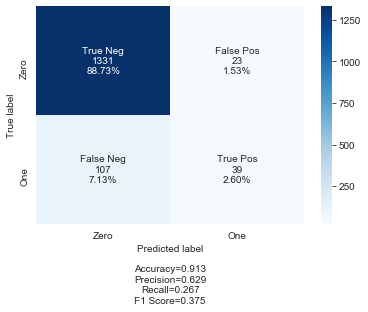

In [14]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm,group_names=labels,categories=categories, cmap='Blues')

In [15]:
scores = cross_val_score(gnb0, X, y, cv=5, scoring='recall')
print(scores.mean())

0.30805806858826


##### With cross validation

In [16]:
scores = cross_val_score(gnb0, X, y, cv=5, scoring='recall')
for i in range(len(scores)):
    print('Fold %d: Accuracy:%g'%(i+1,scores[i]))
print('Average score:%g'%scores.mean())

Fold 1: Accuracy:0.27551
Fold 2: Accuracy:0.316327
Fold 3: Accuracy:0.319588
Fold 4: Accuracy:0.371134
Fold 5: Accuracy:0.257732
Average score:0.308058


###### Alternative method to check recall

In [17]:
'''
model = GaussianNB()
scaler = StandardScaler()
cv=5
kfold = KFold(n_splits=cv)
kfold.get_n_splits(X)

accuracy = np.zeros(cv)
recall = np.zeros(cv)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    TN = confusion_matrix(y_test, predictions)[0][0]
    FP = confusion_matrix(y_test, predictions)[0][1]
    FN = confusion_matrix(y_test, predictions)[1][0]
    TP = confusion_matrix(y_test, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    Rec=TP/(TP+FN)
    
    #accuracy[np_idx] = ACC*100
    recall[np_idx] = Rec*100
    np_idx += 1
    
    #print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))
    print ("Fold {}: Recall: {}%".format(np_idx, round(Rec,3)))  

#print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
print ("Recall Score: {}%({}%)".format(round(np.mean(recall),3),round(np.std(recall),3)))
'''

'\nmodel = GaussianNB()\nscaler = StandardScaler()\ncv=5\nkfold = KFold(n_splits=cv)\nkfold.get_n_splits(X)\n\naccuracy = np.zeros(cv)\nrecall = np.zeros(cv)\nnp_idx = 0\n\nfor train_idx, test_idx in kfold.split(X):\n    X_train, X_test = X.values[train_idx], X.values[test_idx]\n    y_train, y_test = y.values[train_idx], y.values[test_idx]\n    \n    X_train = scaler.fit_transform(X_train)\n    X_test = scaler.transform(X_test)\n    \n    model.fit(X_train, y_train)\n    \n    predictions = model.predict(X_test)\n    \n    TN = confusion_matrix(y_test, predictions)[0][0]\n    FP = confusion_matrix(y_test, predictions)[0][1]\n    FN = confusion_matrix(y_test, predictions)[1][0]\n    TP = confusion_matrix(y_test, predictions)[1][1]\n    total = TN + FP + FN + TP\n    ACC = (TP + TN) / float(total)\n    Rec=TP/(TP+FN)\n    \n    #accuracy[np_idx] = ACC*100\n    recall[np_idx] = Rec*100\n    np_idx += 1\n    \n    #print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))\n    print ("

###### Hyperparameter tuning---Grid search

In [18]:
var_range=[1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]

In [20]:
param_grid = dict(var_smoothing=var_range)

In [21]:
param_grid

{'var_smoothing': [1e-11,
  1e-10,
  1e-09,
  1e-08,
  1e-07,
  1e-06,
  1e-05,
  0.0001,
  0.001,
  0.01,
  0.1]}

In [259]:
gnb = GaussianNB()
grid = GridSearchCV(gnb, param_grid, cv=10, scoring='recall', return_train_score=False)

In [260]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None,
             param_grid={'var_smoothing': [1e-11, 1e-10, 1e-09, 1e-08, 1e-07,
                                           1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                           0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [261]:
res=pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.307618,0.108001,{'var_smoothing': 1e-11}
1,0.307618,0.108001,{'var_smoothing': 1e-10}
2,0.307618,0.108001,{'var_smoothing': 1e-09}
3,0.307618,0.108001,{'var_smoothing': 1e-08}
4,0.307618,0.108001,{'var_smoothing': 1e-07}
5,0.307618,0.108001,{'var_smoothing': 1e-06}
6,0.307618,0.108001,{'var_smoothing': 1e-05}
7,0.307618,0.108001,{'var_smoothing': 0.0001}
8,0.304677,0.111088,{'var_smoothing': 0.001}
9,0.275425,0.105171,{'var_smoothing': 0.01}


In [262]:
print("Best score is ",grid.best_score_)
print("Best parameter is ",grid.best_params_)

Best score is  0.30761824729891957
Best parameter is  {'var_smoothing': 1e-11}


In [ ]:
parameter=res[params].values
mea

###### Use best parameters to predict

In [263]:
y_pred=grid.predict(X_test)
metrics.recall_score(y_test,y_pred)

0.2671232876712329

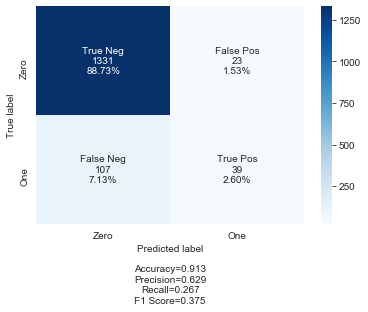

In [264]:
cm=metrics.confusion_matrix(y_test,y_pred)
make_confusion_matrix(cm,group_names=labels,categories=categories, cmap='Blues')

In [234]:
#scores = cross_val_score(grid, X, y, cv=5, scoring='recall')
#print(scores)

##### Optional extra step for nested cross validation

In [235]:
out_cv=5
gnb = GaussianNB()
grid_n = GridSearchCV(gnb, param_grid, cv=5, scoring='recall', return_train_score=False)
result=cross_validate(grid_n, X, y, cv=out_cv, scoring='recall',return_estimator=True)

In [236]:
result_table=pd.DataFrame(result)
result_table;

In [237]:
best_params_ls=[]
for i in range(out_cv):
    best_params_ls.append(result['estimator'][i].best_params_)
print('After nested cross validation, the best parameters for each fold with test score is as following:')
best_params=pd.DataFrame(best_params_ls)

fold=np.arange(1,out_cv+1)
columns={'Fold':fold,'test_score':result_table.test_score}
columns=pd.DataFrame(columns)
final_result=columns.join(best_params)
final_result=final_result[['Fold','var_smoothing','test_score']]
final_result.rename(columns={"var_smoothing" : "Best var_smoothing"}, inplace=True)
final_result.style.hide_index()

After nested cross validation, the best parameters for each fold with test score is as following:


Fold,Best var_smoothing,test_score
1,1e-11,0.27551
2,1e-08,0.306122
3,1e-11,0.319588
4,1e-11,0.371134
5,1e-11,0.257732


#### ROC Curve

In [238]:
y_pred_prob0 = gnb0.predict_proba(X_test)[:, 1]
y_pred_prob = grid.predict_proba(X_test)[:, 1]

In [239]:
# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(8,5))
# plt.plot(fpr, tpr,lw=2, label='ROC curve of having heart disease (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
# plt.xlim([-0.05, 1.0])
# plt.ylim([-0.05, 1.05])
# plt.title('ROC curve for heart disease classifier',fontsize=15)
# plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=15)
# plt.ylabel('True Positive Rate (Sensitivity)',fontsize=15)
# plt.legend(loc=4, fontsize=15)
# plt.grid(True)

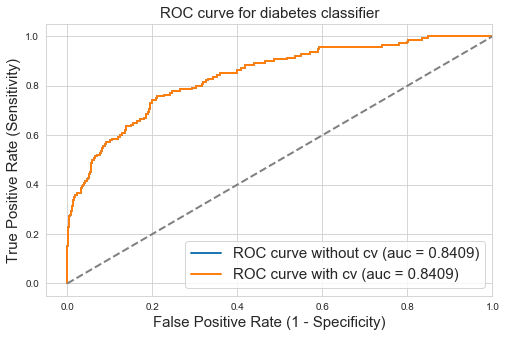

In [240]:
fpr0, tpr0, thresholds0 = metrics.roc_curve(y_test, y_pred_prob0)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc0 = metrics.auc(fpr0, tpr0)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8,5))

plt.plot(fpr0, tpr0,lw=2, label='ROC curve without cv (auc = %0.4f)' % roc_auc0)
plt.plot(fpr, tpr,lw=2, label='ROC curve with cv (auc = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
#plt.margins(0.02)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])

plt.title('ROC curve for diabetes classifier',fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=15)
plt.legend(loc=4, fontsize=15)
plt.grid(True)

#print('AUC score without cv is',metrics.roc_auc_score(y_test, y_pred_prob0))
#print('AUC score with cv is',metrics.roc_auc_score(y_test, y_pred_prob))

#### Bias and variance tradeoff

In [175]:
##Learning curve
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), X_train, y_train, cv = 10, scoring='recall', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 10), verbose=1)

[learning_curve] Training set sizes: [  1259  15119  28979  42839  56699  70559  84419  98279 112139 125999]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


In [176]:
#train_scores

In [177]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

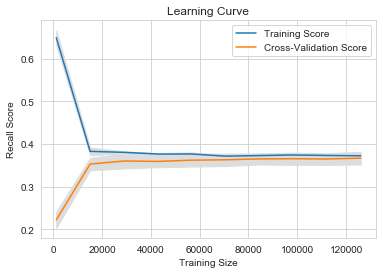

In [178]:
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Cross-Validation Score')
#plt.yscale('log')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color = '#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Recall Score')
plt.legend(loc = 'best')

In [179]:
#Another way to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 10), scoring='recall'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel('cost=1-score')
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, 1-(train_scores_mean - train_scores_std),\
                     1-(train_scores_mean + train_scores_std), alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, 1-(test_scores_mean - test_scores_std),\
                     1-(test_scores_mean + test_scores_std), alpha=0.1, color="g")
    
    plt.plot(train_sizes, 1-train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, 1-test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\qg010\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

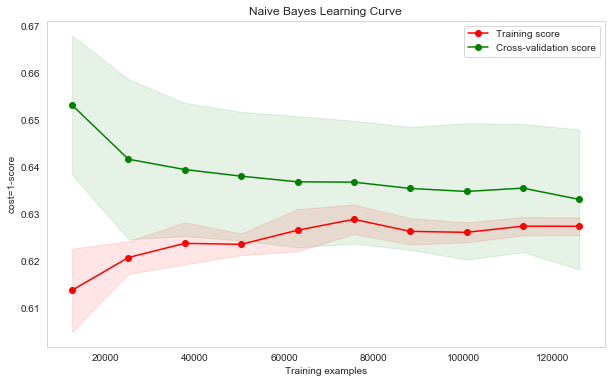

In [180]:
#cv=cross_validation.ShuffleSplit(len(X_train),n_iter=25,test_size=0.25)
plot_learning_curve(GaussianNB(),'Naive Bayes Learning Curve', X_train, y_train, cv=10)